# **Assignment: Random Forest**
Group name : Insurgents_Sales Prediction

Group Submission by

Chaitrali Deshmukh(012501489)
Prathyusha Kasibhatta(013774163)
Sandhya Gadgoli(013798759)
Saylee Vyawahare(013801294)

# **Hypothesis Generation**


> It means understanding the problem better by brainstorming possible factors that can impact the outcome.


> The dataset we have used here is a collection of 2013 Sales data for 1559 products across 10 stores in different cities. It also has certain attributes of each product and stores. The aim is to build a predictive model and find out the sales of each product at a particular store.



# Hypotheses Made based on Data



> **Store Level Hypotheses**

1.   **City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2.   **Population Density:** Stores located in densely populated areas should have higher sales because of more demand.
1.   **Store Capacity:** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
2.   **Competitors:** Stores having similar establishments nearby should have less sales because of more competition.
1.   **Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
2.   **Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.
1.   **Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales.
2.   **Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales. 



> **Product Level Hypotheses:**




1.   **Brand:** Branded products should have higher sales because of higher trust in the customer
2.   **Packaging:** Products with good packaging can attract customers and sell more.
3.   **Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.
4.   **Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5.   **Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6.   **Advertising:** Better advertising of products in the store will should higher sales in most cases.
7.   **Promotional Offers:** Products accompanied with attractive offers and discounts will sell more.











In [0]:
from google.colab import drive
drive.mount('/content/drive'

In [0]:
import pandas as pd
import numpy as np

#load the dataset

test = pd.read_csv('/content/drive/My Drive/BigMart_dataset/Test.csv')
train = pd.read_csv('/content/drive/My Drive/BigMart_dataset/Walmart_Train.csv')


print('#################Training Dataset###########################')
train.head()


print('#################Testing Dataset###########################')
test.head()

#################Training Dataset###########################
#################Testing Dataset###########################


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [0]:
#Combining train and test dataset for feature engineering

train['source']='train'
test['source']='test'

data = pd.concat([train, test],ignore_index=True, sort=True)

print(train.shape, test.shape, data.shape)



(8523, 13) (5681, 12) (14204, 13)


# Finding columns for missing values

In [0]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

Here, we can see that our Target column which Item_Outlet_Sales has missing values but its present in the Test set so we will concerntrate on Outlet_Weight & Outlet_Size in data cleaning section.  

In [0]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


# Initial Observations:



1.   Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2.   Outlet_Establishment_Years vary from 1985 to 2009. The values are not that useful for us. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales
3.   The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.









# Categorical Variable Exploration:

In [0]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores.
Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. We can right now exclude the ID and source variables for obvious reasons.

# Filtering categorical variables

In [0]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

# The output gives us following observations:



1.   **Item_Fat_Content:** Some of 'Low Fat' values mis-coded as 'low fat' and 'LF'. Also, some of 'Regular' are mentioned as 'regular'.
2.   **Item_Type:** Not all categories have substantial numbers. It looks like combining them can give better results.
3.   **Outlet_Type:** Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.



# Data Cleaning

Data Cleaning typically involves imputing missing values and treating outliers. Outlier is an observation / extream values that diverges from an overall pattern on a sample.



> **Imputting Missing Values**


> We found two variables Item_Weight and Outlet_Size has some missing values. Lets impute them by taking the average weight of the particular item. 


  









In [0]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')


#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 


#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])

print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


**Now, we have no missing values in Item_Weight, Lets impute Outlet_Size.**

In [0]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)


#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 


#Impute data and check #missing values before and after imputation to confirm
print('\nOrignal #missing: %d'% sum(miss_bool))

data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

print(sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium

Orignal #missing: 4016
0


# Feature Engineering

In this section, we will try to resolve all the inconsistancies in our data for perfect analysis.


**Step 1: Outlet_type**


> Lets try to analyze the respective sales for categories in Outlet_type













In [0]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


The above table shows that each category has significant difference in their sales so it makes no sense to combine any of them.

**Step 2: Item_Visibility**


> We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.




In [0]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))

data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0




> So we can see that there are no values which are zero.



> In the data hypotheses, we assumed that products with higher visibility are likely to sell more. But along with that we should also consider visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this





In [0]:
#Determine another variable with means ratio

data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)

print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


**Thus, we have succesfully created a new varible "Item_Visibility_MeanRatio"**

**Step 3: Item_Type**


> We know that Item_Type variable has 16 categories which might prove to be very useful in analysis. Item_Identifier has unique ID for each item. It starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. 



In [0]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])


#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

**Step4: Outlet_Years**


> We can make a new column having the years of operation of a store.



In [0]:
#Years:

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

**Step 5: Modify categories of Item_Fat_Content**


> We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:



In [0]:
#Change categories of low fat:
print('Original Categories:')

print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [0]:
#Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

**Step 6: Numerical and One-Hot Coding of Categorical variables**


> Lets convert categories of nominal variables into numeric types. we want Outlet_Identifier as a variable so seperately created "Outlet" same as Outlet_Identifier.



In [0]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). 

In [0]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type', 'Item_Type_Combined','Outlet'])


data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [0]:
#Lets look at Item_Fat_Content column

data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


**Step 7: Exporting Data**

In [0]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [0]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [0]:
#Drop unnecessary columns:
#test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
#train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("/content/drive/My Drive/BigMart_dataset/ML_Project_train.csv",index=False)
test.to_csv("/content/drive/My Drive/BigMart_dataset/ML_Project_test.csv",index=False)


# Applying Random Forest Classification 

Here we are trying to classify the Sales on features selected from above conclusion.



In [0]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

#loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/BigMart_dataset/ML_Project_train.csv')

dataset.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,1.000000,15,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,1.000000,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [0]:
feature_cols = ['Item_MRP', 'Item_Weight', 'Outlet_Years',	'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',	'Outlet_Location_Type_1', 'Outlet_Location_Type_2',	'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',  'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',	'Item_Type_Combined_0',	'Item_Type_Combined_1',	'Item_Type_Combined_2']

X = dataset[feature_cols]

S = dataset.Item_Outlet_Sales

#converting float values into int
S1 = S.round(0).astype(int)

# Target variable
y = S1

In [0]:
X.head()

,Item_MRP,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,249.8092,9.30,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,48.2692,5.92,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,141.6180,17.50,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,182.0950,19.20,15,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,53.8614,8.93,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [0]:
y.head()

0    3735
1     443
2    2097
3     732
4     995
Name: Item_Outlet_Sales, dtype: int64

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
import collections
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

0.4301916308173641


In [0]:
def gettreeImg(clf,columns):
    dot_data = tree.export_graphviz(clf,
                                    feature_names=columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
    return graph


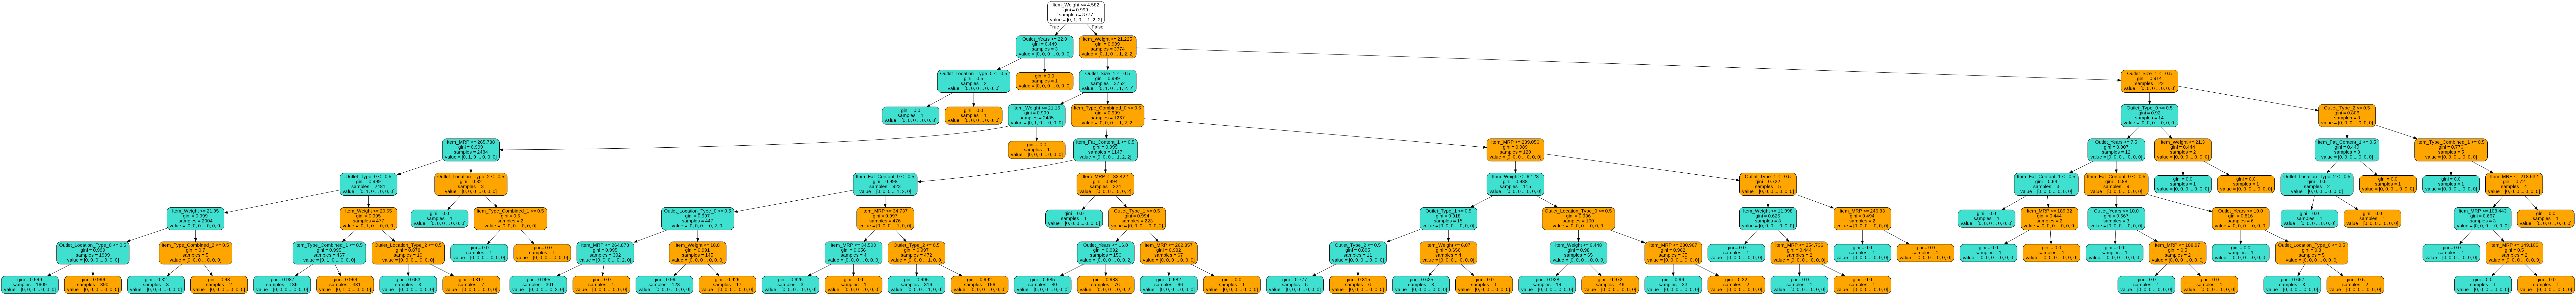

In [0]:
from IPython.display import Image
Image(gettreeImg(clf.estimators_[5],feature_cols).create_png())

# Conclusion:

In this assignment, we have made some little changes in our feature selection and also added some new feature columns by analyzing the data behavior. Also, by using Random Forest Classification we have seen that accuracy on predicted target value has significantly improved by using multiple decision trees.